<a href="https://colab.research.google.com/github/srujayreddyv/sigmaml-q3/blob/main/notebooks/SigmaML_Q3_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final

Mounted at /content/drive


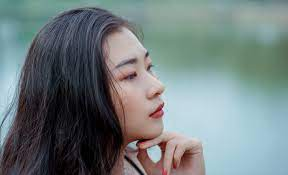

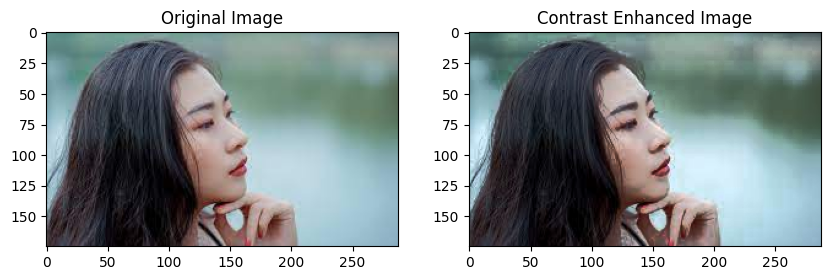

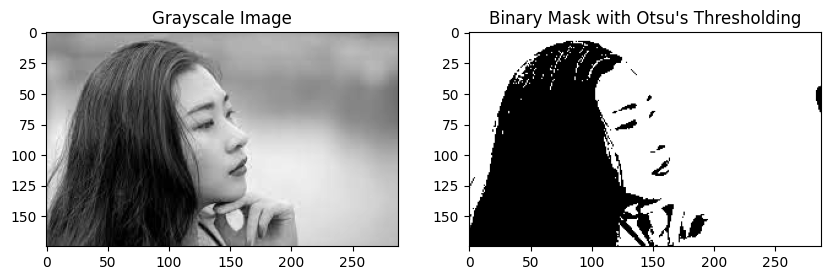

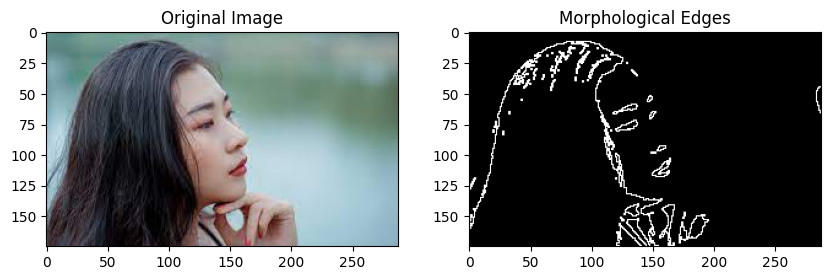

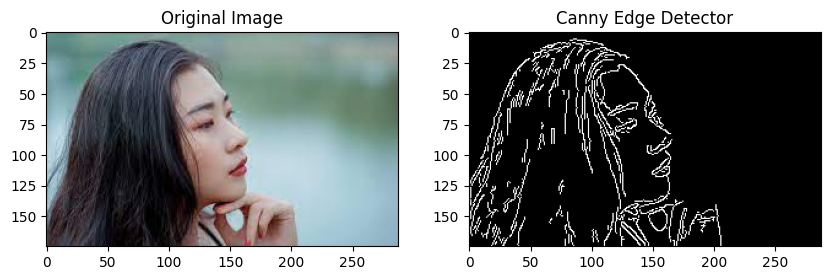

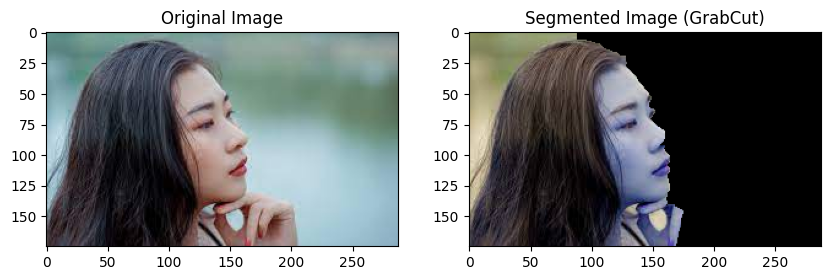

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

# Load the image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)

# Display the original image
cv2_imshow(image)

### Q1. Enhance the contrast of the image (using Histogram Equalization on HSV Value channel)
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hsv[..., 2] = cv.equalizeHist(hsv[..., 2])
enhanced_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display the original and enhanced images side by side for comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title("Contrast Enhanced Image")
plt.show()

### Q2. Extract the mask of the person using Otsu's thresholding

# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
ret2, mask = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the original grayscale image and the mask side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask with Otsu's Thresholding")
plt.show()

### Q3a. Extract edges using only morphological operations
kernel = np.ones((2,2), np.uint8)
morph_edges = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel)

# Display the original and morphological edges side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(morph_edges, cmap='gray')
plt.title("Morphological Edges")
plt.show()

### Q3b. Extract edges using standard edge detector (Canny)
edges = cv.Canny(image, 100, 200)

# Display the original and edge-detected images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detector")
plt.show()

### Q4. Use GrabCut to segment the image
mask_grabcut = np.zeros(image.shape[:2], np.uint8)
rect = (0, 0, 175, 250)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(image, mask_grabcut, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to extract the segmented object
mask2 = np.where((mask_grabcut == 2) | (mask_grabcut == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]

# Display the original and segmented images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented Image (GrabCut)")
plt.show()

#0.0 Imports

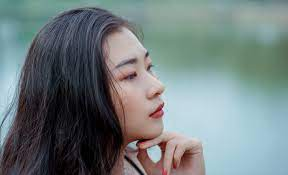

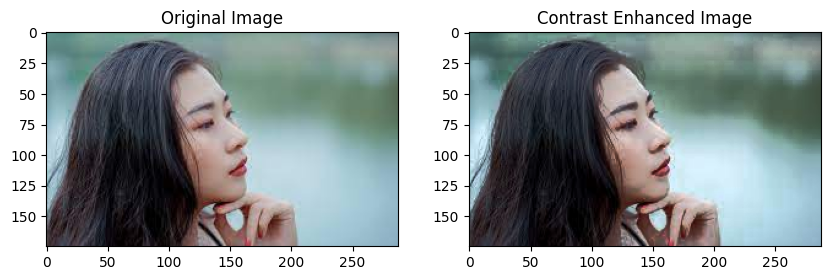

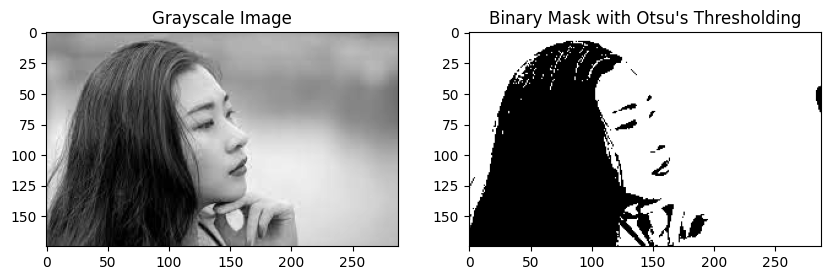

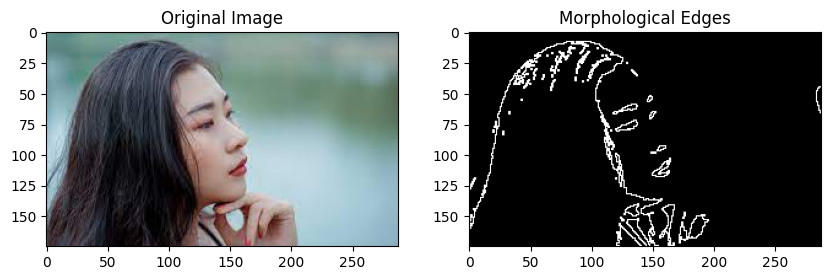

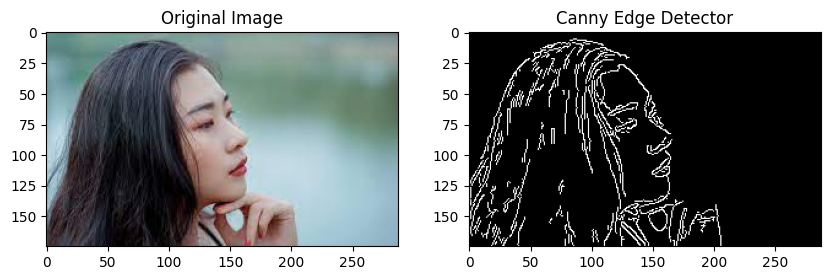

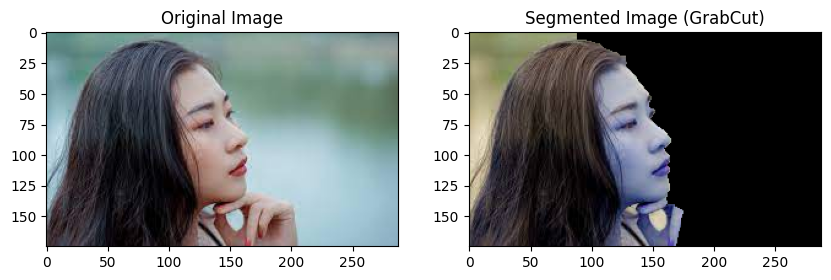

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)

# Display the original image
cv2_imshow(image)

### Q1. Enhance the contrast of the image (using Histogram Equalization on HSV Value channel)
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hsv[..., 2] = cv.equalizeHist(hsv[..., 2])
enhanced_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display the original and enhanced images side by side for comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title("Contrast Enhanced Image")
plt.show()

### Q2. Extract the mask of the person using Otsu's thresholding

# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
ret2, mask = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the original grayscale image and the mask side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask with Otsu's Thresholding")
plt.show()

### Q3a. Extract edges using only morphological operations
kernel = np.ones((2,2), np.uint8)
morph_edges = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel)

# Display the original and morphological edges side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(morph_edges, cmap='gray')
plt.title("Morphological Edges")
plt.show()

### Q3b. Extract edges using standard edge detector (Canny)
edges = cv.Canny(image, 100, 200)

# Display the original and edge-detected images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detector")
plt.show()

### Q4. Use GrabCut to segment the image
mask_grabcut = np.zeros(image.shape[:2], np.uint8)
rect = (0, 0, 175, 250)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(image, mask_grabcut, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to extract the segmented object
mask2 = np.where((mask_grabcut == 2) | (mask_grabcut == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]

# Display the original and segmented images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented Image (GrabCut)")
plt.show()

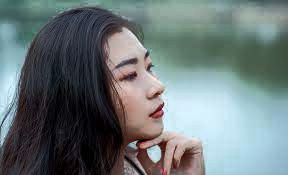

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Load the image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)

# Convert the image from BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Apply Histogram Equalization to the Value channel
hsv[..., 2] = cv.equalizeHist(hsv[..., 2])

# Convert back to BGR
enhanced_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display the result
cv2_imshow(enhanced_image)

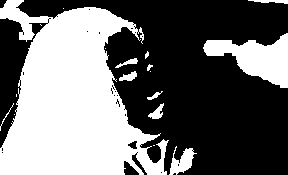

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png')

# Convert to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding to create a binary mask
_, mask = cv.threshold(gray, 128, 255, cv.THRESH_BINARY_INV)

# Display the mask
cv2_imshow(mask)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


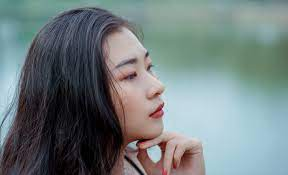

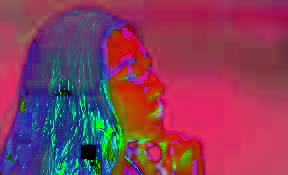

(175, 288, 3)


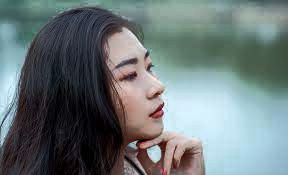

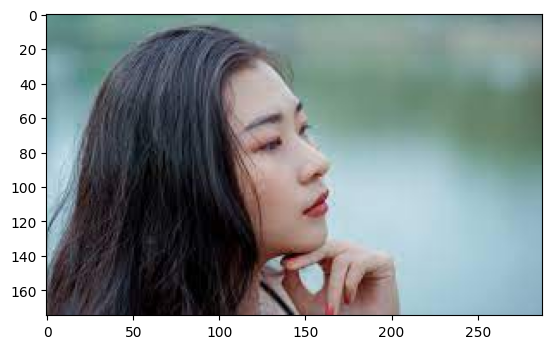

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)
plt.imshow(img)

#RGB -> BGR
cv2_imshow(img)

# Converting to RGB
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(hsv)
print(hsv.shape)

#1.0 Enhance the contrast of the image

# Equivalise the histogram
new_value = cv.equalizeHist(hsv[..., 2])

# Update the value channel
hsv[:, :, 2] = new_value

# Convert image back to BGR
new_rgb_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display
cv2_imshow(new_rgb_image)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


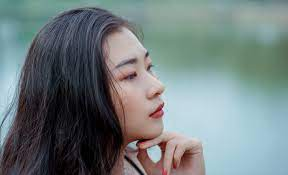

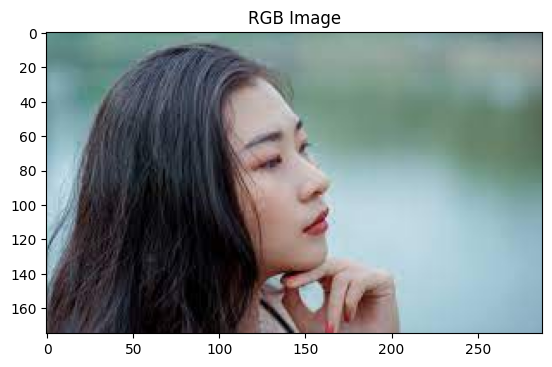

HSV Shape: (175, 288, 3)


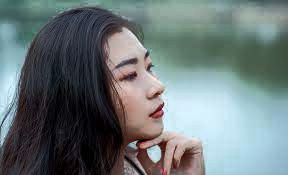

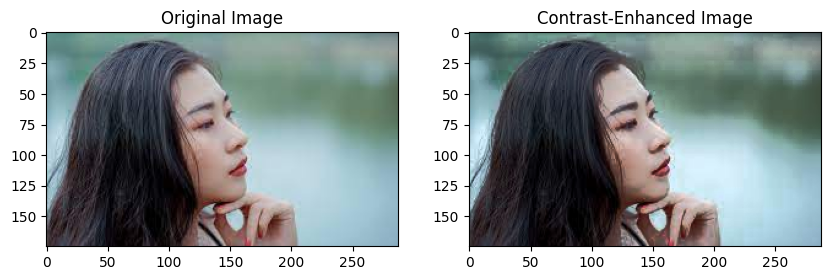

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

# Load the image in BGR format
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)

# Display the original BGR image
cv2_imshow(img)

# Convert BGR to RGB for matplotlib visualization
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title("RGB Image")
plt.show()

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
print("HSV Shape:", hsv.shape)

#1.0 Enhance the contrast of the image

# Enhance the contrast of the image by applying histogram equalization to the value channel
hsv[..., 2] = cv.equalizeHist(hsv[..., 2])  # Equalizing the value (V) channel

# Convert the HSV image back to BGR color space
enhanced_img = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display the contrast-enhanced image
cv2_imshow(enhanced_img)

# Optional: Plot side-by-side comparison using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB))
plt.title("Contrast-Enhanced Image")

plt.show()

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


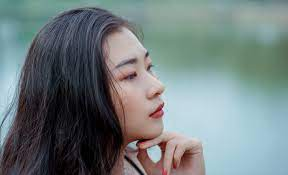

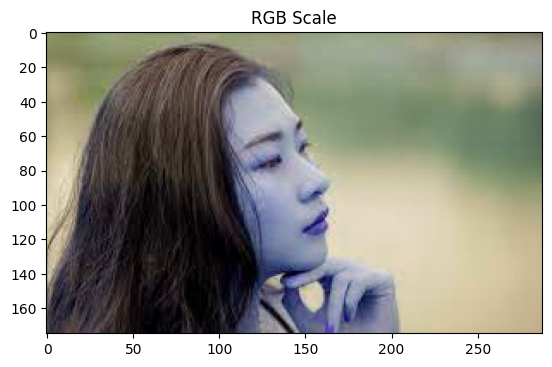

In [ ]:
# Load the image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)
plt.imshow(image)
plt.title("RGB Scale")
cv2_imshow(image)

# Load the image
#image = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_GRAYSCALE)
#plt.imshow(image, cmap="gray")
#plt.title("Gray Scale")


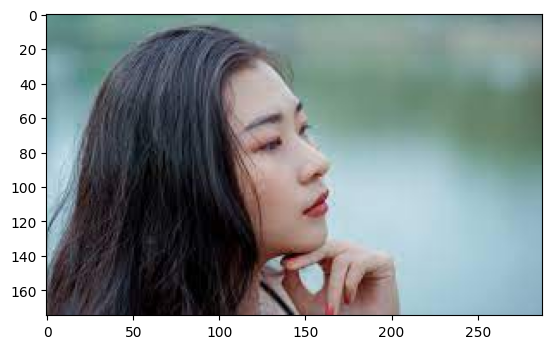

In [ ]:
#converting to RGB
RGB_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)

#1.0 Enhance the contrast of the image

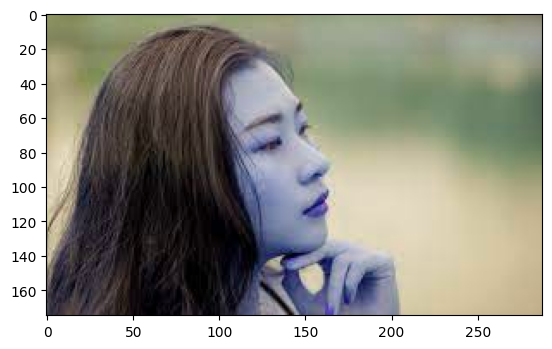

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)
plt.imshow(img)

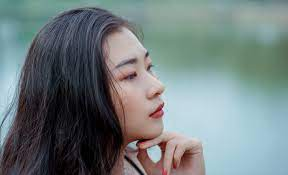

In [ ]:
cv2_imshow(img)

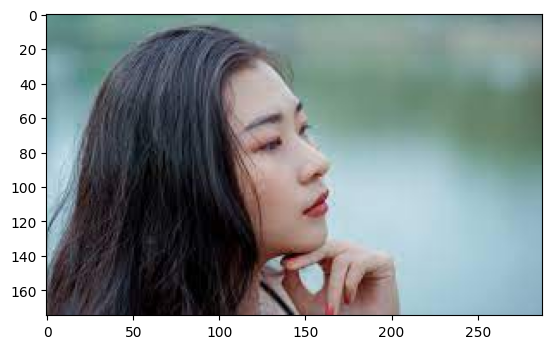

In [ ]:
# Converting to RGB
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)

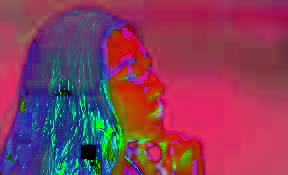

(175, 288, 3)


In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(hsv)
print(hsv.shape)

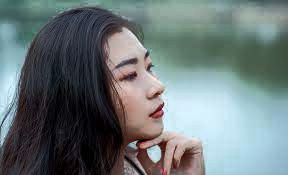

In [ ]:
# Equivalise the histogram
new_value = cv.equalizeHist(hsv[..., 2])

# Update the value channel
hsv[:, :, 2] = new_value

# Convert image back to BGR
new_rgb_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display
cv2_imshow(new_rgb_image)

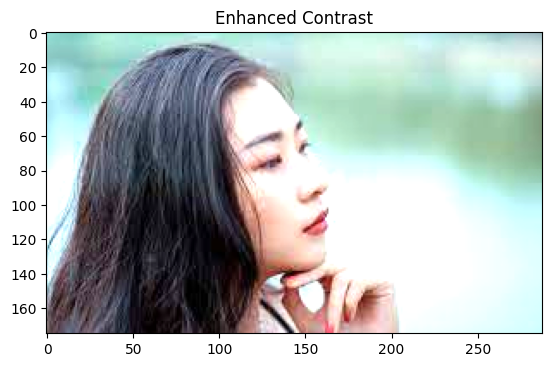

In [ ]:
# 1. Enhance the contrast of the image
enhanced_image = cv.convertScaleAbs(image, alpha=1.5, beta=0)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Contrast')
plt.show()

# 2.0 Extract the mask of the person from the image

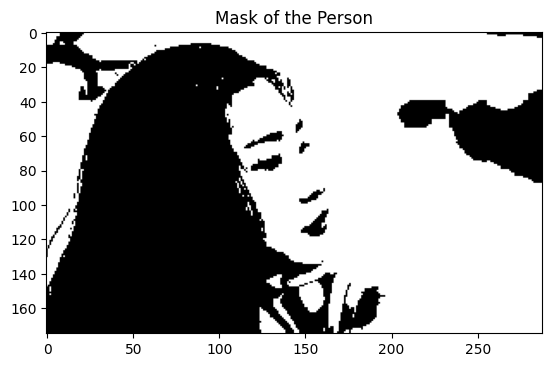

In [ ]:
# 2. Extract the mask of the person from the image
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
plt.imshow(mask, cmap='gray')
plt.title('Mask of the Person')
plt.show()

#3.0 Extract the edges of just the person using- Only Morphological Operations and Standard Edge Detector


## 3.1 Only Morphological Operations

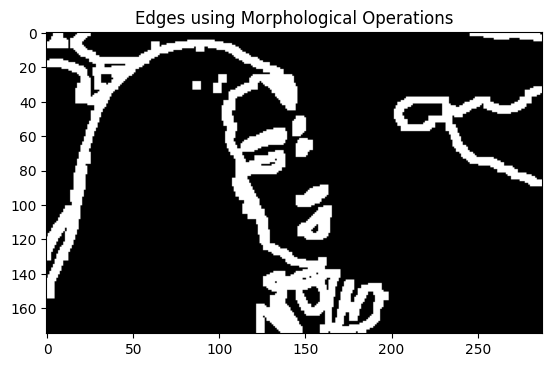

In [ ]:
# 3a. Extract the edges of just the person using Only Morphological Operations
kernel = np.ones((5,5), np.uint8)
morph_edges = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel)
plt.imshow(morph_edges, cmap='gray')
plt.title('Edges using Morphological Operations')
plt.show()

## 3.2 Standard Edge Detector

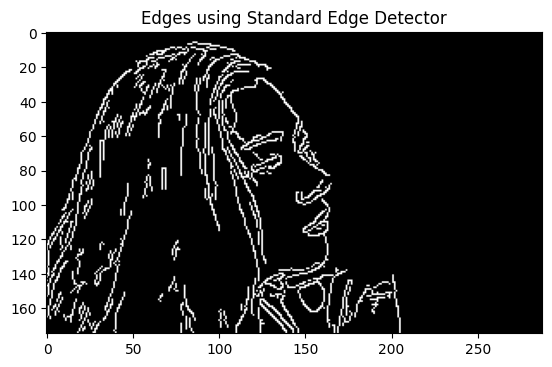

In [ ]:
# 3b. Extract the edges of just the person using Standard Edge Detector
edges = cv.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edges using Standard Edge Detector')
plt.show()

#4.0 Use GrabCut (from OpenCV) to segment the given image

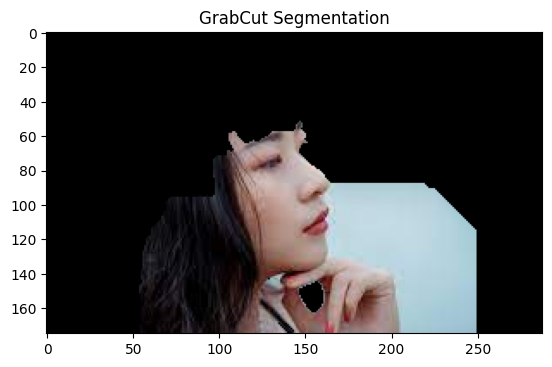

In [ ]:
# 4. Use GrabCut (from OpenCV) to segment the given image
mask_gc = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (50, 50, 200, 200)
cv.grabCut(image, mask_gc, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask_gc == 2) | (mask_gc == 0), 0, 1).astype('uint8')
grabcut_result = image * mask2[:, :, np.newaxis]
plt.imshow(cv.cvtColor(grabcut_result, cv.COLOR_BGR2RGB))
plt.title('GrabCut Segmentation')
plt.show()

#Submission

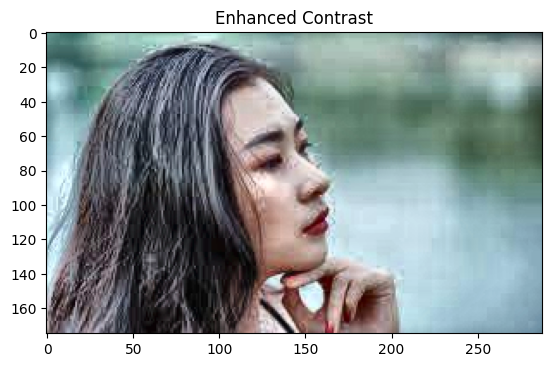

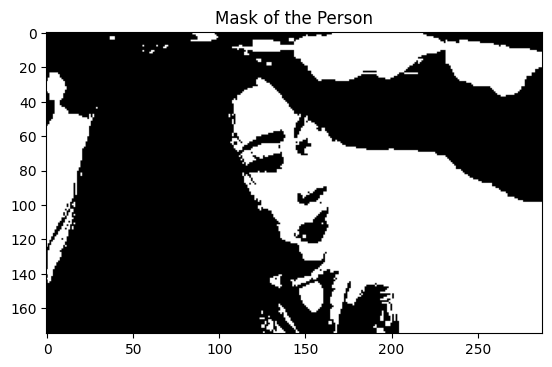

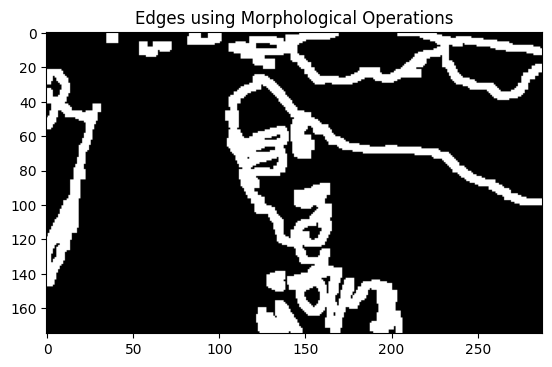

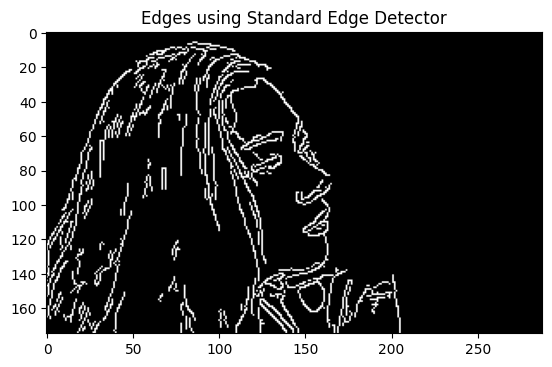

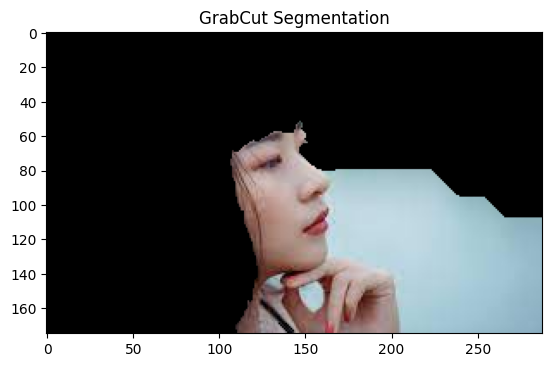

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png')

# 1. Enhance the contrast of the image
# Convert image to LAB color model
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

# Apply CLAHE to L-channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
cl = clahe.apply(l)

# Merge the CLAHE enhanced L-channel with the a and b channels
limg = cv2.merge((cl, a, b))

# Convert image from LAB back to BGR
enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Contrast')
plt.show()

# 2. Extract the mask of the person from the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')
plt.title('Mask of the Person')
plt.show()

# 3a. Extract the edges of just the person using Only Morphological Operations
kernel = np.ones((5,5), np.uint8)
morph_edges = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
plt.imshow(morph_edges, cmap='gray')
plt.title('Edges using Morphological Operations')
plt.show()

# 3b. Extract the edges of just the person using Standard Edge Detector
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edges using Standard Edge Detector')
plt.show()

# 4. Use GrabCut (from OpenCV) to segment the given image
mask_gc = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)
cv2.grabCut(image, mask_gc, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask_gc == 2) | (mask_gc == 0), 0, 1).astype('uint8')
grabcut_result = image * mask2[:, :, np.newaxis]
plt.imshow(cv2.cvtColor(grabcut_result, cv2.COLOR_BGR2RGB))
plt.title('GrabCut Segmentation')
plt.show()